### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
!pip install pandas_datareader
import pandas_datareader as pdr
key = "f3986af9a9d514d027bd634c1bae0c8be06766e0"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-10-12 00:00:00+00:00,111.60,112.75,111.44,112.73,30467204,25.779066,26.044711,25.742107,26.040091,121868816,0.0,1.0
1,AAPL,2015-10-13 00:00:00+00:00,111.79,112.45,110.68,110.82,33049256,25.822955,25.975412,25.566550,25.598890,132197024,0.0,1.0
2,AAPL,2015-10-14 00:00:00+00:00,110.21,111.52,109.56,111.29,44462449,25.457983,25.760586,25.307836,25.707458,177849796,0.0,1.0
3,AAPL,2015-10-15 00:00:00+00:00,111.86,112.10,110.49,110.93,37673452,25.839125,25.894564,25.522661,25.624299,150693808,0.0,1.0
4,AAPL,2015-10-16 00:00:00+00:00,111.04,112.00,110.53,111.78,39232609,25.649709,25.871464,25.531901,25.820645,156930436,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-10-05 00:00:00+00:00,116.50,116.65,113.5500,113.91,106243839,116.50,116.65,113.5500,113.91,106243839,0.0,1.0
1255,AAPL,2020-10-06 00:00:00+00:00,113.16,116.12,112.2500,115.70,161498212,113.16,116.12,112.2500,115.70,161498212,0.0,1.0
1256,AAPL,2020-10-07 00:00:00+00:00,115.08,115.55,114.1300,114.62,96848985,115.08,115.55,114.1300,114.62,96848985,0.0,1.0
1257,AAPL,2020-10-08 00:00:00+00:00,114.97,116.40,114.5901,116.25,83477153,114.97,116.40,114.5901,116.25,83477153,0.0,1.0
1258,AAPL,2020-10-09 00:00:00+00:00,116.97,117.00,114.9200,115.28,100506865,116.97,117.00,114.9200,115.28,100506865,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       111.60
1       111.79
2       110.21
3       111.86
4       111.04
         ...  
1254    116.50
1255    113.16
1256    115.08
1257    114.97
1258    116.97
Name: close, Length: 1259, dtype: float64

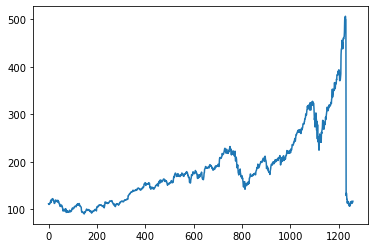

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       111.60
1       111.79
2       110.21
3       111.86
4       111.04
         ...  
1254    116.50
1255    113.16
1256    115.08
1257    114.97
1258    116.97
Name: close, Length: 1259, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.0511365 ]
 [0.05159351]
 [0.04779314]
 ...
 [0.05950692]
 [0.05924233]
 [0.06405292]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(818, 441)

In [19]:
train_data

array([[0.0511365 ],
       [0.05159351],
       [0.04779314],
       [0.05176188],
       [0.04978954],
       [0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.05616356],
       [0.06482261],
       [0.06840649],
       [0.06965725],
       [0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.044

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Train on 717 samples, validate on 340 samples
Epoch 1/50
717/717 [==============================] - 19s 26ms/sample - loss: 0.0088 - val_loss: 0.0535
Epoch 2/50
717/717 [==============================] - 5s 7ms/sample - loss: 0.0018 - val_loss: 0.0215
Epoch 3/50
717/717 [==============================] - 5s 6ms/sample - loss: 5.2266e-04 - val_loss: 0.0289
Epoch 4/50
717/717 [==============================] - 5s 6ms/sample - loss: 4.2807e-04 - val_loss: 0.0208
Epoch 5/50
717/717 [==============================] - 4s 6ms/sample - loss: 3.4077e-04 - val_loss: 0.0200
Epoch 6/50
717/717 [==============================] - 4s 6ms/sample - loss: 3.1771e-04 - val_loss: 0.0199
Epoch 7/50
717/717 [==============================] - 4s 6ms/sample - loss: 2.9627e-04 - val_loss: 0.0186
Epoch 8/50
717/717 [==============================] - 4s 6ms/sample - loss: 2.8408e-04 - val_loss: 0.0180
Epoch 9/50
717/717 [==============================] - 4s 6ms/sample - loss: 2.8726e-04 - val_loss: 0.0174
Epoch 

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.1.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

153.98081862291542

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

275.354741397034

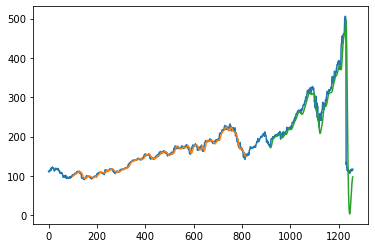

In [36]:
### Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.5505472038484667,
 0.5448226097414313,
 0.5497294046903187,
 0.5445339747444378,
 0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.67990378833433

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03186192]
101
1 day input [0.54482261 0.5497294  0.54453397 0.54785328 0.54819002 0.54744438
 0.55684907 0.56043295 0.56471437 0.55797956 0.58006013 0.5847745
 0.61010222 0.63138906 0.59064342 0.59761876 0.60769693 0.62956103
 0.62838244 0.62871918 0.62388455 0.64589296 0.6643175  0.64875526
 0.66025256 0.63328924 0.65289236 0.66015634 0.65849669 0.65849669
 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825 0.70131088
 0.71651233 0.72293446 0.711365   0.70948888 0.72901984 0.71595911
 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162
 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088
 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044 0.99360192
 0.98366807 1.         0.98544799 0.9834997  0.09308479 0.10544799
 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825
 0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0

8 day output [[0.03383425]]
9 day input [0.56471437 0.55797956 0.58006013 0.5847745  0.61010222 0.63138906
 0.59064342 0.59761876 0.60769693 0.62956103 0.62838244 0.62871918
 0.62388455 0.64589296 0.6643175  0.64875526 0.66025256 0.63328924
 0.65289236 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341
 0.70001203 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446
 0.711365   0.70948888 0.72901984 0.71595911 0.71858088 0.67598316
 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111
 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601
 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201
 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807 1.
 0.98544799 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761
 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837
 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161
 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278
 0.06361996 0.05455201 0.062922

16 day output [[0.0304983]]
17 day input [0.60769693 0.62956103 0.62838244 0.62871918 0.62388455 0.64589296
 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236 0.66015634
 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567
 0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.03186192
 0.0362092  0.0383889  0

25 day output [[0.03143674]]
26 day input [0.63328924 0.65289236 0.66015634 0.65849669 0.65849669 0.68192423
 0.6791341  0.70001203 0.7039567  0.70556825 0.70131088 0.71651233
 0.72293446 0.711365   0.70948888 0.72901984 0.71595911 0.71858088
 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597
 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782
 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.03186192 0.0362092  0.0383889  0.03894112
 0.03845107 0.03740824 0.03616257 0.03493249 0.03383425 0.03291477
 0.03217953 0.0316128

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1259

In [51]:
day_pred.shape

(30,)

In [50]:
scaler.inverse_transform(lst_output).shape

(30, 1)

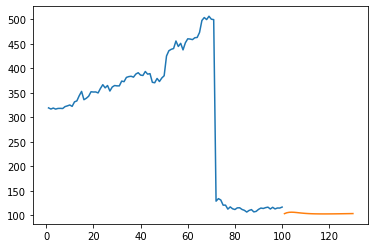

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

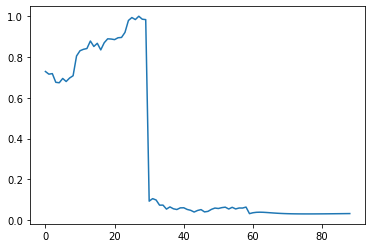

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

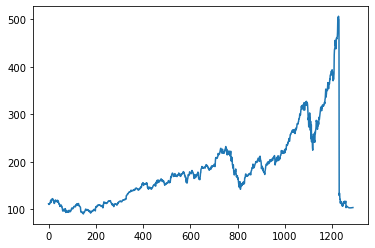

In [55]:
plt.plot(df3)